In [41]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

In [42]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [43]:



url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

text = ["a photo of a cat", "a photo of a dog"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [44]:
# print probabilities next to text
for i in range(len(text)):
    print(f"{text[i]}: {probs.tolist()[0][i]:.2f}")

a photo of a cat: 0.99
a photo of a dog: 0.01


In [45]:



url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

text = ["a photo of a cat", "a photo of a tv remote"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
# print probabilities next to text
for i in range(len(text)):
    print(f"{text[i]}: {probs.tolist()[0][i]:.2f}")

a photo of a cat: 0.91
a photo of a tv remote: 0.09


In [46]:



url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

text = ["a photo of a cat", "a photo of two tv remotes"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
# print probabilities next to text
for i in range(len(text)):
    print(f"{text[i]}: {probs.tolist()[0][i]:.2f}")

a photo of a cat: 0.01
a photo of two tv remotes: 0.99


In [47]:



url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

text = ["a photo of a cat", "a photo of two tv remotes", "a photo of two cats and two tv remotes"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
# print probabilities next to text
for i in range(len(text)):
    print(f"{text[i]}: {probs.tolist()[0][i]:.2f}")

a photo of a cat: 0.00
a photo of two tv remotes: 0.08
a photo of two cats and two tv remotes: 0.92


In [48]:

path = "/Users/szymonlaszczynski/Documents/Projects/Studia/2024_winter/LLMs/uwr-modele-jezykowe-2024/proj_01/img/satellite.png"


image = Image.open(path)

text = ["a photo of a car", "a photo of a river", "a photo of a city"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
# print probabilities next to text
for i in range(len(text)):
    print(f"{text[i]}: {probs.tolist()[0][i]:.2f}")

a photo of a car: 0.05
a photo of a river: 0.40
a photo of a city: 0.56


In [49]:

path = "/Users/szymonlaszczynski/Documents/Projects/Studia/2024_winter/LLMs/uwr-modele-jezykowe-2024/proj_01/img/satellite.png"

image = Image.open(path)

text = ["a photo of a car", "a photo of a river", "a photo of a city", "a photo containing a part of a city with a river, buildings, roads and some cars in the parking lots", "a satellite image of a seacoast with industrial buildings and ship containers"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
# print probabilities next to text
for i in range(len(text)):
    print(f"{text[i]}: {probs.tolist()[0][i]:.2f}")

a photo of a car: 0.00
a photo of a river: 0.01
a photo of a city: 0.01
a photo containing a part of a city with a river, buildings, roads and some cars in the parking lots: 0.11
a satellite image of a seacoast with industrial buildings and ship containers: 0.88


river: 0.05
cat: 0.38
dog: 0.56
puddle: 0.01


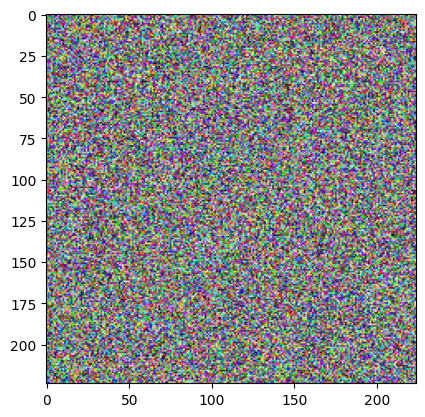

In [50]:
# generate a randomised noise image
import numpy as np
import matplotlib.pyplot as plt

image = np.random.randint(0, 256, (224, 224, 3), dtype=np.uint8)
image = Image.fromarray(image)

text = ["river", "cat", "dog", "puddle"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
# print probabilities next to text
for i in range(len(text)):
    print(f"{text[i]}: {probs.tolist()[0][i]:.2f}")

# display the image
plt.imshow(image)


In [51]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/szymonlaszczynski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
from nltk.corpus import wordnet as wn

# Get all nouns from WordNet
nouns = {word.name().split(".")[0] for word in wn.all_synsets('n')}

print("Total nouns:", len(nouns))
print("Sample nouns:", list(nouns)[:10])  # Display a few nouns

Total nouns: 67176
Sample nouns: ['magpie', 'manse', 'nominalism', 'bailiffship', 'vigor', 'palmyra', 'boron_trifluoride', "binder's_board", 'ganoid', 'silver_quandong']


In [62]:
import torch
import clip
from tqdm import tqdm
from PIL import Image

# Load CLIP model
model, preprocess = clip.load("ViT-B/32", device="mps")

# Load and preprocess image
preproc_image = preprocess(image).unsqueeze(0).to("mps")

# Create text descriptions
# take only 10000 nouns to avoid OOM
# nouns_subset = list(nouns)[:3000]
text_descriptions = [f"a photo of a {noun}" for noun in nouns]
text_tokens = clip.tokenize(text_descriptions).to("mps")

# Compute similarities
with torch.no_grad():
    image_features = model.encode_image(preproc_image)

    # split text features into chunks to avoid OOM
    chunk_size = 1000
    text_features = []
    for i in tqdm(range(0, text_tokens.shape[0], chunk_size)):
        text_features.append(model.encode_text(text_tokens[i:i + chunk_size]))

    # text_features = model.encode_text(text_tokens)

    text_features = torch.cat(text_features, dim=0)
    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity
    similarities = (image_features @ text_features.T).squeeze(0)

    K = 20
    # Find the most probable K nouns with their similarities
    top_similarities, top_indices = similarities.topk(K)
    top_nouns = [text_descriptions[i] for i in top_indices]

print("Most probable nouns:")
for noun, similarity in zip(top_nouns, top_similarities):
    print(f"{noun}: {similarity.item():.2f}")


100%|██████████| 68/68 [03:05<00:00,  2.73s/it]


Most probable nouns:
a photo of a quadrillion: 0.31
a photo of a epileptic_seizure: 0.31
a photo of a eyestrain: 0.31
a photo of a matrix: 0.31
a photo of a noise_conditions: 0.31
a photo of a nonsingular_matrix: 0.31
a photo of a field-sequential_color_television: 0.31
a photo of a extremely_high_frequency: 0.31
a photo of a cryptic_coloration: 0.30
a photo of a matrix_inversion: 0.30
a photo of a ascii_text_file: 0.30
a photo of a matrix_multiplication: 0.30
a photo of a code: 0.30
a photo of a generative_grammar: 0.30
a photo of a diagonal_matrix: 0.30
a photo of a op_art: 0.30
a photo of a neural_network: 0.30
a photo of a singular_matrix: 0.30
a photo of a radiation_pattern: 0.30
a photo of a matrix_algebra: 0.30


In [63]:
K = 2000
# Find the most probable K nouns with their similarities
top_similarities, top_indices = similarities.topk(K)
top_nouns = [text_descriptions[i] for i in top_indices]

print("Most probable nouns:")
for noun, similarity in zip(top_nouns, top_similarities):
    print(f"{noun}: {similarity.item():.2f}")

Most probable nouns:
a photo of a quadrillion: 0.31
a photo of a epileptic_seizure: 0.31
a photo of a eyestrain: 0.31
a photo of a matrix: 0.31
a photo of a noise_conditions: 0.31
a photo of a nonsingular_matrix: 0.31
a photo of a field-sequential_color_television: 0.31
a photo of a extremely_high_frequency: 0.31
a photo of a cryptic_coloration: 0.30
a photo of a matrix_inversion: 0.30
a photo of a ascii_text_file: 0.30
a photo of a matrix_multiplication: 0.30
a photo of a code: 0.30
a photo of a generative_grammar: 0.30
a photo of a diagonal_matrix: 0.30
a photo of a op_art: 0.30
a photo of a neural_network: 0.30
a photo of a singular_matrix: 0.30
a photo of a radiation_pattern: 0.30
a photo of a matrix_algebra: 0.30
a photo of a acid_value: 0.30
a photo of a visual_field: 0.30
a photo of a one-dimensional_language: 0.30
a photo of a matrix_transposition: 0.30
a photo of a cortical_epilepsy: 0.30
a photo of a surface_noise: 0.30
a photo of a algorithm: 0.30
a photo of a prime_number: 

In [64]:
def calculate_top_K(K, text_descriptions):    
    text_tokens = clip.tokenize(text_descriptions).to("mps")

    # Compute similarities
    with torch.no_grad():
        image_features = model.encode_image(preproc_image)

        # split text features into chunks to avoid OOM
        chunk_size = 1000
        text_features = []
        for i in tqdm(range(0, text_tokens.shape[0], chunk_size)):
            text_features.append(model.encode_text(text_tokens[i:i + chunk_size]))

        # text_features = model.encode_text(text_tokens)

        text_features = torch.cat(text_features, dim=0)
        # Normalize features
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Compute cosine similarity
        similarities = (image_features @ text_features.T).squeeze(0)

        K = 20
        # Find the most probable K nouns with their similarities
        top_similarities, top_indices = similarities.topk(K)
        top_nouns = [text_descriptions[i] for i in top_indices]
        return top_nouns, top_similarities

top_nouns, top_similarities = calculate_top_K(200, top_nouns)
print("Most probable nouns:")
for noun, similarity in zip(top_nouns, top_similarities):
    print(f"{noun}: {similarity.item():.2f}")

100%|██████████| 2/2 [00:07<00:00,  3.63s/it]


Most probable nouns:
a photo of a quadrillion: 0.32
a photo of a epileptic_seizure: 0.31
a photo of a eyestrain: 0.31
a photo of a noise_conditions: 0.31
a photo of a nonsingular_matrix: 0.31
a photo of a matrix: 0.31
a photo of a cryptic_coloration: 0.31
a photo of a matrix_multiplication: 0.30
a photo of a field-sequential_color_television: 0.30
a photo of a neural_network: 0.30
a photo of a matrix_inversion: 0.30
a photo of a extremely_high_frequency: 0.30
a photo of a op_art: 0.30
a photo of a singular_matrix: 0.30
a photo of a matrix_algebra: 0.30
a photo of a ascii_text_file: 0.30
a photo of a code: 0.30
a photo of a generative_grammar: 0.30
a photo of a diagonal_matrix: 0.30
a photo of a radiation_pattern: 0.30


In [75]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

text_pairs = [
    ["a photo of quadrillion", "a photo of noise"],
    ["an image of quadrillion", "an image of noise"],
    ["quadrillion", "noise"]
]

with torch.no_grad():
    for text_pair in text_pairs:
        inputs = processor(text=text_pair, images=image, return_tensors="pt", padding=True)
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image # this is the image-text similarity score
        probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
        # print probabilities next to text
        for i in range(len(text_pair)):
            print(f"{text_pair[i]}: {probs.tolist()[0][i]:.2f}")
        print("-"*50)



a photo of quadrillion: 0.82
a photo of noise: 0.18
--------------------------------------------------
an image of quadrillion: 0.45
an image of noise: 0.55
--------------------------------------------------
quadrillion: 0.64
noise: 0.36
--------------------------------------------------


In [84]:
import torch
import clip
from tqdm import tqdm
from PIL import Image

# Load CLIP model
model, preprocess = clip.load("ViT-B/32", device="mps")

# Load and preprocess image
preproc_image = preprocess(image).unsqueeze(0).to("mps")

# Create text descriptions
# take only 10000 nouns to avoid OOM
# nouns_subset = list(nouns)[:3000]
text_descriptions = list(nouns)
text_tokens = clip.tokenize(nouns).to("mps")

# Compute similarities
with torch.no_grad():
    image_features = model.encode_image(preproc_image)

    # split text features into chunks to avoid OOM
    chunk_size = 4000
    text_features = []
    for i in tqdm(range(0, text_tokens.shape[0], chunk_size)):
        text_features.append(model.encode_text(text_tokens[i:i + chunk_size]))

    # text_features = model.encode_text(text_tokens)

    text_features = torch.cat(text_features, dim=0)
    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity
    similarities = (image_features @ text_features.T).squeeze(0)

    K = 20
    # Find the most probable K nouns with their similarities
    top_similarities, top_indices = similarities.topk(K)
    top_nouns = [text_descriptions[i] for i in top_indices]

print("Most probable nouns:")
for noun, similarity in zip(top_nouns, top_similarities):
    print(f"{noun}: {similarity.item():.2f}")


100%|██████████| 17/17 [08:35<00:00, 30.32s/it]


Most probable nouns:
field-sequential_color_television: 0.32
nonsingular_matrix: 0.31
singular_matrix: 0.31
diagonal_matrix: 0.31
feed_grain: 0.30
square_matrix: 0.30
computerized_tomography: 0.30
matrix_multiplication: 0.30
epileptic_seizure: 0.30
ascii_text_file: 0.30
random_number_generator: 0.30
radiation_pattern: 0.30
floating-point_notation: 0.30
matrix_inversion: 0.30
focal_seizure: 0.30
neural_network: 0.30
color-blind_person: 0.30
flux_density_unit: 0.30
significant_digit: 0.30
cryptic_coloration: 0.30


In [85]:
import torch
import clip
from tqdm import tqdm
from PIL import Image

path = "/Users/szymonlaszczynski/Documents/Projects/Studia/2024_winter/LLMs/uwr-modele-jezykowe-2024/proj_01/img/satellite.png"
image = Image.open(path)

# Load CLIP model
model, preprocess = clip.load("ViT-B/32", device="mps")

# Load and preprocess image
preproc_image = preprocess(image).unsqueeze(0).to("mps")

# Create text descriptions
# take only 10000 nouns to avoid OOM
# nouns_subset = list(nouns)[:3000]
text_descriptions = list(nouns)
text_tokens = clip.tokenize(nouns).to("mps")

# Compute similarities
with torch.no_grad():
    image_features = model.encode_image(preproc_image)

    # split text features into chunks to avoid OOM
    chunk_size = 4000
    text_features = []
    for i in tqdm(range(0, text_tokens.shape[0], chunk_size)):
        text_features.append(model.encode_text(text_tokens[i:i + chunk_size]))

    # text_features = model.encode_text(text_tokens)

    text_features = torch.cat(text_features, dim=0)
    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity
    similarities = (image_features @ text_features.T).squeeze(0)

    K = 20
    # Find the most probable K nouns with their similarities
    top_similarities, top_indices = similarities.topk(K)
    top_nouns = [text_descriptions[i] for i in top_indices]

print("Most probable nouns:")
for noun, similarity in zip(top_nouns, top_similarities):
    print(f"{noun}: {similarity.item():.2f}")


100%|██████████| 17/17 [04:40<00:00, 16.48s/it]


Most probable nouns:
naval_academy: 0.29
charlestown_navy_yard: 0.28
massachusetts_institute_of_technology: 0.28
navy_yard: 0.28
united_states_naval_academy: 0.28
naval_research_laboratory: 0.27
carnegie_mellon_university: 0.27
espoo: 0.27
berlin_doughnut: 0.27
bird's_eye_view: 0.27
darmstadtium: 0.27
synchrotron: 0.27
sewage_disposal_plant: 0.27
thermal_reactor: 0.27
bundesbank: 0.27
detention_basin: 0.27
university_of_washington: 0.27
navy_base: 0.27
naval_surface_warfare_center: 0.27
synchrocyclotron: 0.26


In [102]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

text_pairs = [
    ["naval_academy", "cars, river and buildings", "a building next to a river", "a satellite photo"],
    ["a satellite photo of a naval_academy", "a satellite photo of cars, a river and buildings", "a satellite photo a building next to a river"],
    ["an satellites photographic buildings under an rivers", "a satellite photo city shoreline"], # invalid sentence with valid content, valid sentence with less accurate content
    ["a satellite photo of with a river, city buildings, roads and parked cars", "a satellite photo of synchrocyclotron"] # invalid sentence with valid content, valid sentence with less accurate content
]

with torch.no_grad():
    for text_pair in text_pairs:
        inputs = processor(text=text_pair, images=image, return_tensors="pt", padding=True)
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image # this is the image-text similarity score
        probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
        # print probabilities next to text
        for i in range(len(text_pair)):
            print(f"{text_pair[i]}: {probs.tolist()[0][i]:.2f}")
        print("-"*50)


naval_academy: 0.45
cars, river and buildings: 0.02
a building next to a river: 0.18
a satellite photo: 0.36
--------------------------------------------------
a satellite photo of a naval_academy: 0.28
a satellite photo of cars, a river and buildings: 0.08
a satellite photo a building next to a river: 0.64
--------------------------------------------------
an satellites photographic buildings under an rivers: 0.83
a satellite photo city shoreline: 0.17
--------------------------------------------------
a satellite photo of with a river, city buildings, roads and parked cars: 0.00
a satellite photo of synchrocyclotron: 1.00
--------------------------------------------------


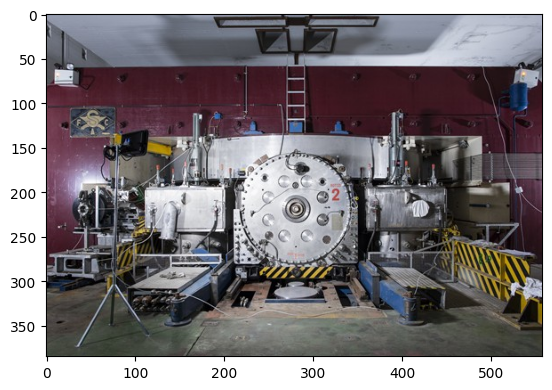

In [105]:
# display image of a synchrocyclotron
# source: https://cds.cern.ch/images/CERN-CE-1212246-2/file?size=medium
path = "/Users/szymonlaszczynski/Documents/Projects/Studia/2024_winter/LLMs/uwr-modele-jezykowe-2024/c5/img/synchrocyclotron.jpg"
image = Image.open(path)
plt.imshow(image)


# CAPTION GENERATION

In [2]:
import torch
import torch.nn as nn
from transformers import CLIPProcessor, CLIPModel, GPT2LMHeadModel, GPT2Tokenizer
from PIL import Image

from project import MappingNetwork, MappingNetwork2, generate_caption


In [3]:
DEVICE = torch.device("mps")
CLIP_VIT_16 = "openai/clip-vit-base-patch16"
# CLIP_VIT_32 = "openai/clip-vit-base-patch32"
MODEL_NAME = CLIP_VIT_16

# Load CLIP model and processor from Hugging Face
clip_model = CLIPModel.from_pretrained(MODEL_NAME).to(DEVICE)
clip_processor = CLIPProcessor.from_pretrained(MODEL_NAME)


In [4]:

# Load GPT-2 model and tokenizer
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2").to(DEVICE)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# GPT-2 does not have a pad token by default; set it to the EOS token.
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token


In [5]:

# Define parameters
prefix_length = 10  # Number of tokens used as a prefix for conditioning GPT-2
clip_embedding_dim = clip_model.config.projection_dim   # e.g., 512
gpt2_embedding_dim = gpt2_model.config.n_embd            # e.g., 768

# Initialize the mapping network (this should be pre-trained on image-caption pairs)
# mapping_network = MappingNetwork(clip_embedding_dim, prefix_length, gpt2_embedding_dim).to(DEVICE)
# mapping_network.load_state_dict(torch.load("mapping_network.pth"))
mapping_network = MappingNetwork2(clip_embedding_dim, prefix_length, gpt2_embedding_dim).to(DEVICE)
mapping_network.load_state_dict(torch.load("mapping_network2.pth"))



/var/folders/my/qpyjqnl50l50rv_jcmx0phwh0000gn/T/ipykernel_55854/2378721623.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mapping_network.load_state_dict(torch.load("

<All keys matched successfully>

How mapped embeddings look like:
odil�S after4ationsaceed
--------------------------------------------------
tensor([[1058,  220]], device='mps:0')
Generated caption: 4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17


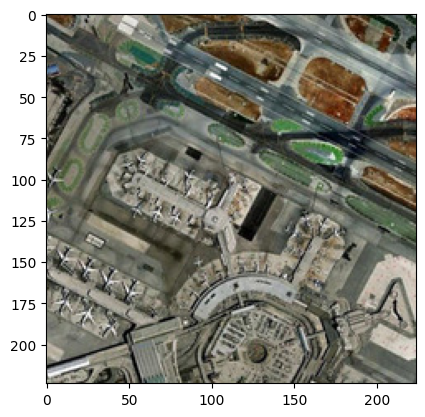

: 

In [7]:
from PIL import Image
from datasets import load_dataset
import matplotlib.pyplot as plt

# Specify the path to your image file
# image_path = "/Users/szymonlaszczynski/Documents/Projects/Studia/2024_winter/LLMs/uwr-modele-jezykowe-2024/proj_01/img/satellite.png"
image_path = "/Users/szymonlaszczynski/Documents/Projects/Studia/2024_winter/LLMs/uwr-modele-jezykowe-2024/proj_01/img/remote_cats.jpg"
image = Image.open(image_path)
dataset = load_dataset("arampacha/rsicd", split="train")
item = dataset[132]
image = item['image']
plt.imshow(image)

# Generate and print the caption
caption = generate_caption(image, clip_model, clip_processor, gpt2_model, gpt2_tokenizer,
                            mapping_network, prefix_length, DEVICE)
print("Generated caption:", caption)

# CAPTION GEN 2

In [12]:
import clip
import os
from torch import nn
import numpy as np
import torch
import torch.nn.functional as nnf
import sys
from typing import Tuple, List, Union, Optional
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm, trange
import PIL.Image

def generate_beam(model, tokenizer, beam_size: int = 5, prompt=None, embed=None,
                  entry_length=67, temperature=1., stop_token: str = '.'):

    model.eval()
    stop_token_index = tokenizer.encode(stop_token)[0]
    tokens = None
    scores = None
    device = next(model.parameters()).device
    seq_lengths = torch.ones(beam_size, device=device)
    is_stopped = torch.zeros(beam_size, device=device, dtype=torch.bool)
    with torch.no_grad():
        if embed is not None:
            generated = embed
        else:
            if tokens is None:
                tokens = torch.tensor(tokenizer.encode(prompt))
                tokens = tokens.unsqueeze(0).to(device)
                generated = model.gpt.transformer.wte(tokens)
        for i in range(entry_length):
            outputs = model.gpt(inputs_embeds=generated)
            logits = outputs.logits
            logits = logits[:, -1, :] / (temperature if temperature > 0 else 1.0)
            logits = logits.softmax(-1).log()
            if scores is None:
                scores, next_tokens = logits.topk(beam_size, -1)
                generated = generated.expand(beam_size, *generated.shape[1:])
                next_tokens, scores = next_tokens.permute(1, 0), scores.squeeze(0)
                if tokens is None:
                    tokens = next_tokens
                else:
                    tokens = tokens.expand(beam_size, *tokens.shape[1:])
                    tokens = torch.cat((tokens, next_tokens), dim=1)
            else:
                logits[is_stopped] = -float(np.inf)
                logits[is_stopped, 0] = 0
                scores_sum = scores[:, None] + logits
                seq_lengths[~is_stopped] += 1
                scores_sum_average = scores_sum / seq_lengths[:, None]
                scores_sum_average, next_tokens = scores_sum_average.view(-1).topk(beam_size, -1)
                next_tokens_source = next_tokens // scores_sum.shape[1]
                seq_lengths = seq_lengths[next_tokens_source]
                next_tokens = next_tokens % scores_sum.shape[1]
                next_tokens = next_tokens.unsqueeze(1)
                tokens = tokens[next_tokens_source]
                tokens = torch.cat((tokens, next_tokens), dim=1)
                generated = generated[next_tokens_source]
                scores = scores_sum_average * seq_lengths
                is_stopped = is_stopped[next_tokens_source]
            next_token_embed = model.gpt.transformer.wte(next_tokens.squeeze()).view(generated.shape[0], 1, -1)
            generated = torch.cat((generated, next_token_embed), dim=1)
            is_stopped = is_stopped + next_tokens.eq(stop_token_index).squeeze()
            if is_stopped.all():
                break
    scores = scores / seq_lengths
    output_list = tokens.cpu().numpy()
    output_texts = [tokenizer.decode(output[:int(length)]) for output, length in zip(output_list, seq_lengths)]
    order = scores.argsort(descending=True)
    output_texts = [output_texts[i] for i in order]
    return output_texts


def generate2(
        model,
        tokenizer,
        tokens=None,
        prompt=None,
        embed=None,
        entry_count=1,
        entry_length=67,  # maximum number of words
        top_p=0.8,
        temperature=1.,
        stop_token: str = '.',
):
    model.eval()
    generated_num = 0
    generated_list = []
    stop_token_index = tokenizer.encode(stop_token)[0]
    filter_value = -float("Inf")
    device = next(model.parameters()).device

    with torch.no_grad():

        for entry_idx in trange(entry_count):
            if embed is not None:
                generated = embed
            else:
                if tokens is None:
                    tokens = torch.tensor(tokenizer.encode(prompt))
                    tokens = tokens.unsqueeze(0).to(device)

                generated = model.gpt.transformer.wte(tokens)

            for i in range(entry_length):

                outputs = model.gpt(inputs_embeds=generated)
                logits = outputs.logits
                logits = logits[:, -1, :] / (temperature if temperature > 0 else 1.0)
                sorted_logits, sorted_indices = torch.sort(logits, descending=True)
                cumulative_probs = torch.cumsum(nnf.softmax(sorted_logits, dim=-1), dim=-1)
                sorted_indices_to_remove = cumulative_probs > top_p
                sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[
                                                    ..., :-1
                                                    ].clone()
                sorted_indices_to_remove[..., 0] = 0

                indices_to_remove = sorted_indices[sorted_indices_to_remove]
                logits[:, indices_to_remove] = filter_value
                next_token = torch.argmax(logits, -1).unsqueeze(0)
                next_token_embed = model.gpt.transformer.wte(next_token)
                if tokens is None:
                    tokens = next_token
                else:
                    tokens = torch.cat((tokens, next_token), dim=1)
                generated = torch.cat((generated, next_token_embed), dim=1)
                if stop_token_index == next_token.item():
                    break

            output_list = list(tokens.squeeze().cpu().numpy())
            output_text = tokenizer.decode(output_list)
            generated_list.append(output_text)

    return generated_list[0]

In [13]:
from PIL import Image
import clip

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
    print ("MPS available.")
else:
    print ("MPS device not found.")

image_path = "/Users/szymonlaszczynski/Documents/Projects/Studia/2024_winter/LLMs/uwr-modele-jezykowe-2024/proj_01/img/remote_cats.jpg"
pil_image = Image.open(image_path).convert("RGB")
# pil_image = PIL.Image.fromarray(image)
clip_model, preprocess = clip.load("ViT-B/32", device=DEVICE, jit=False)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

image = preprocess(pil_image).unsqueeze(0).to(DEVICE)
with torch.no_grad():
    # if type(model) is ClipCaptionE2E:
    #     prefix_embed = model.forward_image(image)
    # else:
    prefix = clip_model.encode_image(image).to(DEVICE, dtype=torch.float32)
    prefix_embed = mapping_network(prefix).reshape(1, prefix_length, -1)
# if use_beam_search:
    # generated_text_prefix = generate_beam(model, tokenizer, embed=prefix_embed)[0]
# else:
    generated_text_prefix = generate2(mapping_network, tokenizer, embed=prefix_embed)


print('\n')
print(generated_text_prefix)

MPS available.


  0%|          | 0/1 [00:00<?, ?it/s]


AttributeError: 'MappingNetwork' object has no attribute 'gpt'